In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/Users/myoung/data-science/Customer Segmentation/CC GENERAL.csv")

In [3]:
#Replace Null Values with mean
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(value=df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(value=df['CREDIT_LIMIT'].mean())

In [4]:
# split features into Categorical and Numerical 
catogrical = [x for x in df.columns if df[x].dtype == "object"]
numeric = [x for x in df.columns if df[x].dtype == "float64"]

In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
#Drop CUST_ID
df.drop(['CUST_ID'], axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

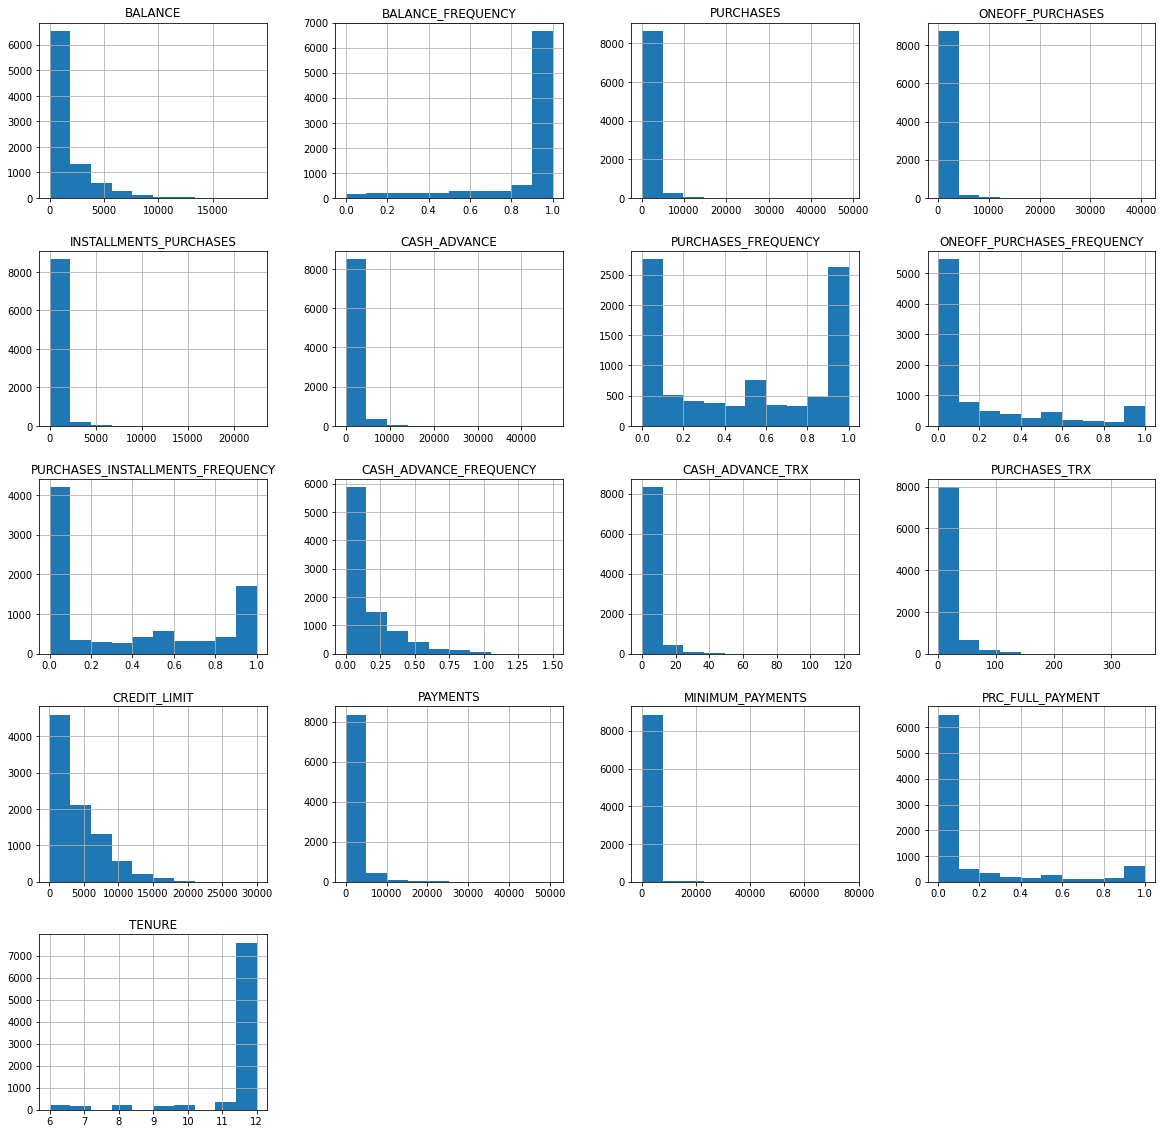

In [7]:
df.hist(figsize = (20,20))

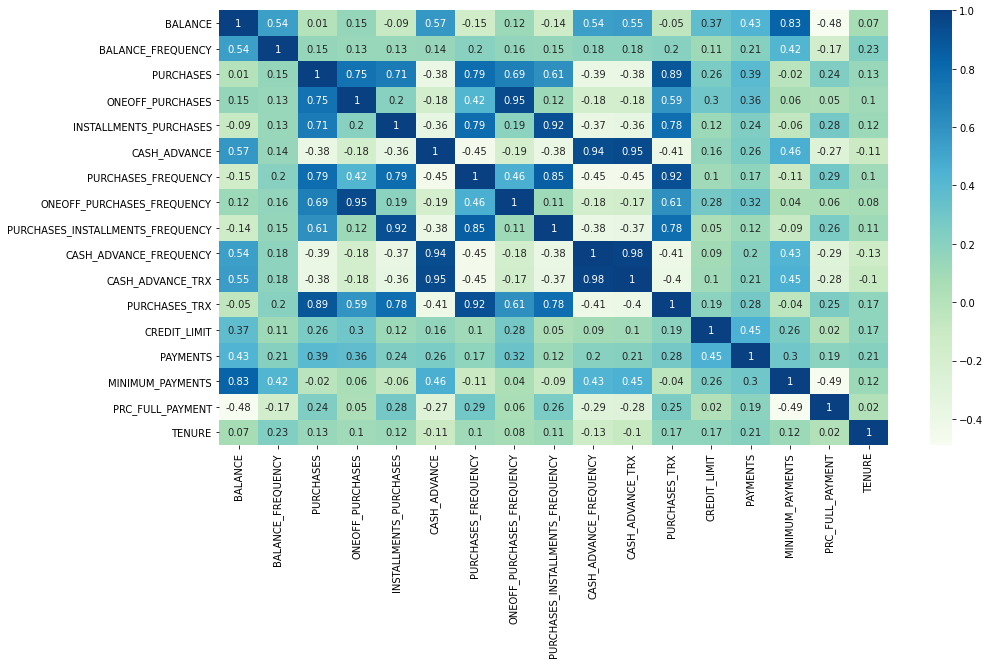

In [8]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15, 8))
sns.heatmap(round(df[numerical_features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

In [9]:
#Standardizing data
scale = StandardScaler()
train_data = scale.fit_transform(df)

In [10]:
train_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [11]:
#Elbow Method ans Silhouette Method
cluster_range = np.arange(2,20)
sse_values = []
sil_values = []

for i in cluster_range:
    k = KMeans(n_clusters=i,init='k-means++')
    k.fit(train_data)
    sse_values.append(k.inertia_)
    sil_values.append(silhouette_score(train_data, k.predict(train_data)))

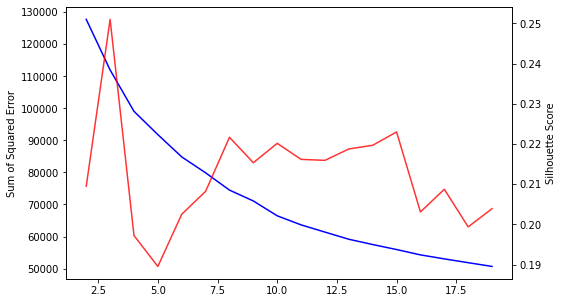

In [12]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(cluster_range, sse_values, '-', color='blue')
ax1.set_ylabel('Sum of Squared Error')

ax2 = ax1.twinx()
ax2.plot(cluster_range, sil_values, '-', color='red', alpha=0.8)
ax2.set_ylabel('Silhouette Score')

plt.xlabel('Number of clusters')
plt.show()

In [16]:
#5 Clusters
kmeans = KMeans(n_clusters=5, init='k-means++', algorithm='elkan')

#predict the labels of clusters.
label = kmeans.fit_predict(train_data)

In [30]:
centroids=pd.DataFrame(data=kmeans.cluster_centers_, columns= [df.columns])
centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.441624,0.105004,-0.096103,-0.256440,0.243845,-0.381893,0.912280,-0.398972,1.080896,-0.485297,-0.372129,0.077843,-0.355966,-0.275884,-0.079587,0.403976,-0.046513
1,1.467698,0.381911,-0.238301,-0.174589,-0.242803,1.745300,-0.521760,-0.240432,-0.457891,1.781770,1.676743,-0.294884,0.840248,0.645383,0.490998,-0.402310,-0.103170
2,-0.244793,-0.337912,-0.339038,-0.220946,-0.395598,-0.171115,-0.814640,-0.354002,-0.751417,-0.081328,-0.152337,-0.472981,-0.315475,-0.251158,-0.113173,-0.284417,-0.046213
3,0.158653,0.431358,0.896181,0.840422,0.574939,-0.298137,1.080315,1.782363,0.556321,-0.384338,-0.306754,1.159997,0.681981,0.360735,-0.014757,0.382944,0.276932
4,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613


In [ ]:
#https://www.kaggle.com/abhinavjhanwar/credit-analysis-kmeans-hc-gaussian-spectral-dbscan

In [17]:
pca=PCA(n_components=2)
pcafit=pca.fit_transform(train_data)
pcafit

array([[-1.68222333, -1.07645026],
       [-1.13829786,  2.50647578],
       [ 0.96967834, -0.38351994],
       ...,
       [-0.92620499, -1.81078465],
       [-2.33655506, -0.65796573],
       [-0.55642169, -0.40046835]])

In [18]:
pca_df = pd.DataFrame(data=pcafit,columns=['pca1','pca2'])
pca_df

,pca1,pca2
0,-1.682223,-1.076450
1,-1.138298,2.506476
2,0.969678,-0.383520
3,-0.873628,0.043166
4,-1.599437,-0.688580
...,...,...
8945,-0.359629,-2.016144
8946,-0.564378,-1.639123
8947,-0.926205,-1.810785
8948,-2.336555,-0.657966


In [19]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':label})],axis=1)

,pca1,pca2,cluster
0,-1.682223,-1.076450,2
1,-1.138298,2.506476,1
2,0.969678,-0.383520,3
3,-0.873628,0.043166,2
4,-1.599437,-0.688580,2
...,...,...,...
8945,-0.359629,-2.016144,0
8946,-0.564378,-1.639123,0
8947,-0.926205,-1.810785,0
8948,-2.336555,-0.657966,2


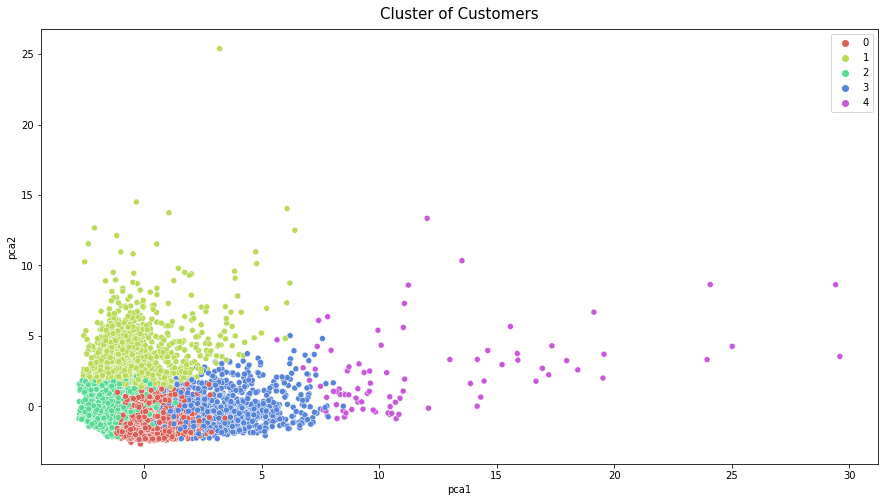

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='pca1', y='pca2', 
                hue='cluster', data=pca_df, palette=sns.color_palette('hls',5))
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()